     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 876.1 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.6 MB/s eta 0:00:00a 0:00:01
Graph structure:
 Data(x=[4, 2], edge_index=[2, 4])


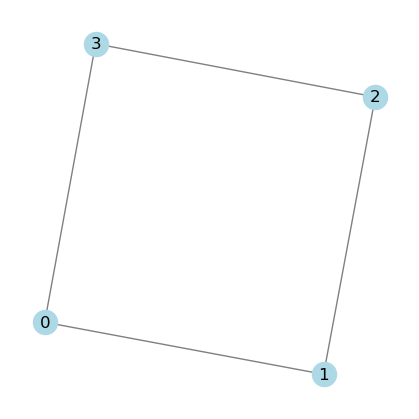

GCN(
  (conv1): GCNConv(2, 4)
  (relu): ReLU()
  (conv2): GCNConv(4, 1)
)


In [1]:
# Install PyTorch Geometric (if not installed)
try:
    import torch_geometric
except ImportError:
    !pip install torch-geometric

# Import necessary libraries
import torch
import torch.nn as nn
import torch_geometric.nn as pyg_nn
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx

# Step 1: Create a simple graph with node features and edges
x = torch.tensor([[0.5, 1.0], [1.5, 2.0], [2.5, 3.0], [3.5, 4.0]], dtype=torch.float)
edge_index = torch.tensor([[0, 1, 2, 3], [1, 2, 3, 0]], dtype=torch.long)

graph = Data(x=x, edge_index=edge_index)
print("Graph structure:\n", graph)

# Step 2: Visualize the graph
G = to_networkx(graph, to_undirected=True)
plt.figure(figsize=(4, 4))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray")
plt.show()

# Step 3: Define a simple Graph Convolutional Network (GCN)
class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = pyg_nn.GCNConv(in_channels, hidden_channels)
        self.relu = nn.ReLU()
        self.conv2 = pyg_nn.GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = self.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Step 4: Create an instance of the GCN model
model = GCN(in_channels=2, hidden_channels=4, out_channels=1)
print(model)


In [2]:
import torch.optim as optim

# Step 1: Generate random target values (for regression task)
graph.y = torch.tensor([[1.0], [2.0], [3.0], [4.0]], dtype=torch.float)  # Targets for each node

# Step 2: Define the loss function (MSE) and optimizer (Adam)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Step 3: Training loop
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()  # Reset gradients
    output = model(graph)  # Forward pass
    loss = criterion(output, graph.y)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Step 4: Print final predictions
predictions = model(graph).detach().numpy()
print("\nFinal Predictions:\n", predictions)



Epoch 0, Loss: 13.7089
Epoch 10, Loss: 7.2559
Epoch 20, Loss: 4.1124
Epoch 30, Loss: 2.5240
Epoch 40, Loss: 1.5691
Epoch 50, Loss: 1.3482
Epoch 60, Loss: 1.3863
Epoch 70, Loss: 1.3607
Epoch 80, Loss: 1.3438
Epoch 90, Loss: 1.3442

Final Predictions:
 [[2.7211792]
 [2.1333408]
 [2.1333408]
 [2.7211792]]


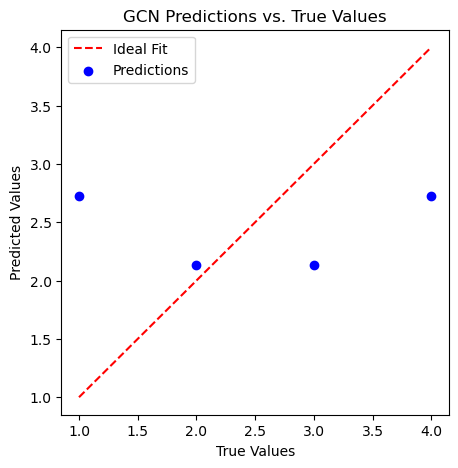

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Get model predictions
predictions = model(graph).detach().numpy()
true_values = graph.y.numpy()

# Plot results
plt.figure(figsize=(5, 5))
plt.scatter(true_values, predictions, color="blue", label="Predictions")
plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], "r--", label="Ideal Fit")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("GCN Predictions vs. True Values")
plt.legend()
plt.show()


In [5]:
import pandas as pd
fpath = '/home/ronnie/Documents/GitHub/nutrient-effect-on-TEX/spreadsheets'
fname = 'coretop_df_full_011525_tmp.csv'
df = pd.read_csv(f'{fpath}/{fname}')
df

,sampleID,core_name,core_type,sample_depth_start,sample_depth_end,Latitude,Longitude,modernWaterDepth,TEX86,fGDGT_0,...,thermocline_nitrate_depthIntegral,region_ID,regionName,TEX_RI_zhang16,deltaRI_zhang16,TEX_RI_new,deltaRI_new,QC_flag2,pred_tex,tex_residuals
0,TEXAS_PSM_RR00001,GeoB7702-3,GC,5.0,6.0,31.6517,34.0733,562.0,0.662000,NaN,...,0.025728,NaN,NaN,2.535230,NaN,2.671335,NaN,exclude,0.592688,0.069312
1,TEXAS_PSM_RR00002,KNR195-5 MC11,MC,6.0,8.0,-1.5327,-86.7852,2288.0,0.602873,0.330589,...,5.318187,10.0,East Equatorial Pacific,2.332461,-0.009145,2.490897,0.149291,include,0.602537,0.000336
2,TEXAS_PSM_RR00003,KNR195-5 MC12,MC,0.0,1.0,-3.7105,-81.1153,378.0,0.570000,NaN,...,4.208444,NaN,NaN,2.229768,NaN,2.390579,NaN,exclude,0.598017,-0.028017
3,TEXAS_PSM_RR00004,KNR195-5 MC16,MC,0.0,1.0,-3.7502,-81.1358,379.0,0.572000,NaN,...,5.378340,NaN,NaN,2.235811,NaN,2.396682,NaN,exclude,0.597470,-0.025470
4,TEXAS_PSM_RR00005,KNR195-5 MC18,MC,4.0,6.0,-3.9690,-81.3100,1024.0,0.599447,0.282415,...,4.969550,10.0,East Equatorial Pacific,2.321423,-0.245102,2.480441,-0.086083,include,0.589827,0.009620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,TEXAS_PSM_RR02077,SY201710_LD-18,NaN,NaN,NaN,20.5700,113.8000,89.0,0.595556,0.236000,...,0.170105,38.0,South China Sea,2.308981,-0.292019,2.468567,-0.132433,include,0.628749,-0.033194
2075,TEXAS_PSM_RR02078,DO201207-08_QD11a,NaN,NaN,NaN,20.7000,113.3700,81.0,0.512500,0.281000,...,0.258762,38.0,South China Sea,2.067394,-0.457606,2.215107,-0.309893,include,0.627801,-0.115301
2076,TEXAS_PSM_RR02079,DO201207-08_QD41,NaN,NaN,NaN,20.1400,112.0600,87.0,0.585859,0.236000,...,0.105737,38.0,South China Sea,2.278413,-0.373587,2.438974,-0.213026,include,0.636040,-0.050181
2077,TEXAS_PSM_RR02080,DO201207-08_E503,NaN,NaN,NaN,19.2000,112.2900,189.0,0.651376,0.237000,...,0.065285,38.0,South China Sea,2.497086,-0.149914,2.638914,-0.008086,include,0.642319,0.009058


In [7]:
df.columns

Index(['sampleID', 'core_name', 'core_type', 'sample_depth_start',
       'sample_depth_end', 'Latitude', 'Longitude', 'modernWaterDepth',
       'TEX86', 'fGDGT_0', 'fGDGT_1', 'fGDGT_2', 'fGDGT_3', 'fGDGT_cren',
       'fGDGT_cren_prime', 'BIT', 'publicationYear', 'reference_name',
       'remark', 'reference_link', 'RI_zhang16', 'RI_zhang16_revised',
       'RI_0to5', 'gdgt23ratio', 'methaneIndex', 'gdgtZeroOverZeroCren',
       'QC_flag', 'match_lat', 'match_lon', 'match_depth', 'SST',
       'thermocline_depth', 'thermocline_T', 'thermocline_T_depthIntegral',
       'SSN', 'thermocline_nitrate', 'thermocline_nitrate_depthIntegral',
       'region_ID', 'regionName', 'TEX_RI_zhang16', 'deltaRI_zhang16',
       'TEX_RI_new', 'deltaRI_new', 'QC_flag2', 'pred_tex', 'tex_residuals'],
      dtype='object')

In [6]:
import numpy as np
from geopy.distance import great_circle
from itertools import combinations

# Extract latitude, longitude, and depth
latitudes = df["Latitude"].values
longitudes = df["Longitude"].values
depths = df["modernWaterDepth"].values

# Set distance threshold (in km) for edge creation
distance_threshold_km = 500  

# Initialize edge list
edge_index = []

# Compute pairwise distances and connect nodes within threshold
for i, j in combinations(range(len(df)), 2):
    coord1 = (latitudes[i], longitudes[i])
    coord2 = (latitudes[j], longitudes[j])
    
    # Calculate haversine distance (great-circle distance in km)
    distance = great_circle(coord1, coord2).km
    
    # Optional: Incorporate depth difference (e.g., threshold it)
    depth_diff = abs(depths[i] - depths[j]) if not np.isnan(depths[i]) and not np.isnan(depths[j]) else np.inf

    if distance <= distance_threshold_km:
        edge_index.append([i, j])
        edge_index.append([j, i])  # Undirected graph

# Convert to PyTorch tensor
edge_index = torch.tensor(edge_index, dtype=torch.long).T

# Check number of edges
num_edges = edge_index.shape[1]
num_nodes = len(df)
num_edges, num_nodes


(68354, 2079)

In [9]:
# Extract node features (GDGTs and environmental variables)
feature_columns = ['fGDGT_0', 'fGDGT_1', 'fGDGT_2', 'fGDGT_3', 'fGDGT_cren','fGDGT_cren_prime',
                   'thermocline_T_depthIntegral','thermocline_nitrate_depthIntegral']
x = torch.tensor(df[feature_columns].fillna(0).values, dtype=torch.float)  # Replace NaN with 0

# Define target variable (e.g., SST)
y = torch.tensor(df["thermocline_T_depthIntegral"].fillna(df["thermocline_T_depthIntegral"].mean()).values, dtype=torch.float).view(-1, 1)  # Fill missing values with mean

# Create PyG graph object
graph = Data(x=x, edge_index=edge_index, y=y)

# Print summary
print(graph)
print(f"Graph has {graph.num_nodes} nodes and {graph.num_edges} edges.")

Data(x=[2079, 8], edge_index=[2, 68354], y=[2079, 1])
Graph has 2079 nodes and 68354 edges.


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch_geometric.nn as pyg_nn

class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = pyg_nn.GCNConv(in_channels, hidden_channels)
        self.relu = nn.ReLU()
        self.conv2 = pyg_nn.GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = self.relu(x)
        x = self.conv2(x, edge_index)
        return x


In [11]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing
num_nodes = graph.num_nodes
train_mask, test_mask = train_test_split(range(num_nodes), test_size=0.2, random_state=42)

train_mask = torch.tensor(train_mask, dtype=torch.long)
test_mask = torch.tensor(test_mask, dtype=torch.long)

# Initialize model, loss, and optimizer
model = GCN(in_channels=graph.num_features, hidden_channels=16, out_channels=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    output = model(graph)
    
    # Compute loss (only on training data)
    loss = criterion(output[train_mask], graph.y[train_mask])
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Training Loss: {loss.item():.4f}")

# Evaluate model on test data
model.eval()
with torch.no_grad():
    test_predictions = model(graph)[test_mask]
    test_loss = criterion(test_predictions, graph.y[test_mask])
    print(f"\nFinal Test Loss: {test_loss.item():.4f}")


Epoch 0, Training Loss: 294.4190
Epoch 10, Training Loss: 94.3037
Epoch 20, Training Loss: 15.6695
Epoch 30, Training Loss: 17.7362
Epoch 40, Training Loss: 12.8394
Epoch 50, Training Loss: 11.3359
Epoch 60, Training Loss: 11.3650
Epoch 70, Training Loss: 10.9811
Epoch 80, Training Loss: 10.9592
Epoch 90, Training Loss: 10.8789
Epoch 100, Training Loss: 10.8350
Epoch 110, Training Loss: 10.7889
Epoch 120, Training Loss: 10.7467
Epoch 130, Training Loss: 10.7064
Epoch 140, Training Loss: 10.6699
Epoch 150, Training Loss: 10.6395
Epoch 160, Training Loss: 10.6094
Epoch 170, Training Loss: 10.5797
Epoch 180, Training Loss: 10.5519
Epoch 190, Training Loss: 10.5262

Final Test Loss: 11.6674


In [13]:
graph

Data(x=[2079, 8], edge_index=[2, 68354], y=[2079, 1])

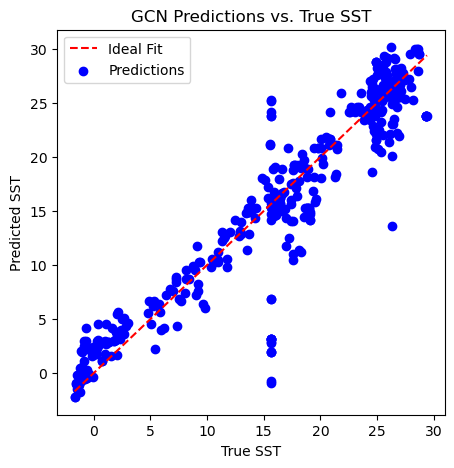

In [12]:
import matplotlib.pyplot as plt

true_values = graph.y[test_mask].detach().numpy()
predicted_values = test_predictions.detach().numpy()

plt.figure(figsize=(5, 5))
plt.scatter(true_values, predicted_values, color="blue", label="Predictions")
plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], "r--", label="Ideal Fit")
plt.xlabel("True SST")
plt.ylabel("Predicted SST")
plt.title("GCN Predictions vs. True SST")
plt.legend()
plt.show()


In [14]:
# Convert PyTorch tensors to NumPy arrays
df["Predicted_SST"] = model(graph).detach().numpy().flatten()

# Display a few rows to check mapping
print(df[["sampleID", "TEX86", "SST", "Predicted_SST"]].head())


            sampleID     TEX86       SST  Predicted_SST
0  TEXAS_PSM_RR00001  0.662000  22.62221      22.831505
1  TEXAS_PSM_RR00002  0.602873  23.40901      25.262527
2  TEXAS_PSM_RR00003  0.570000  23.41811      20.497066
3  TEXAS_PSM_RR00004  0.572000  23.31791      20.497066
4  TEXAS_PSM_RR00005  0.599447  22.38611      20.497066


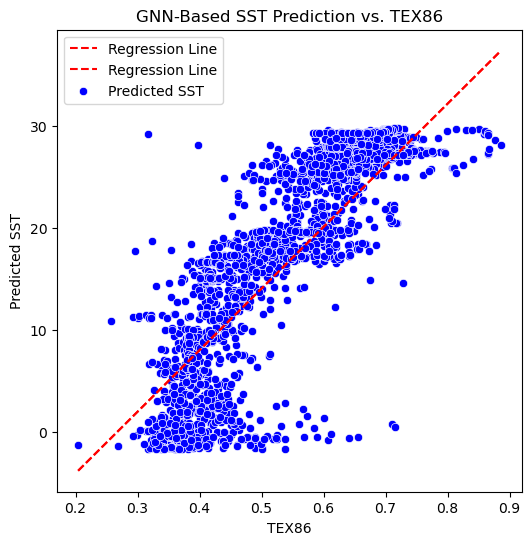

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

plot_data = df.dropna(subset=["TEX86", "SST", "Predicted_SST"])
# Prepare data
X = plot_data["TEX86"].values.reshape(-1, 1)  # TEX86 as independent variable
y = plot_data["SST"].values         # Predicted SST

# Fit a linear regression model
reg = LinearRegression().fit(X, y)


y2 = plot_data["Predicted_SST"].values  # GNN-based SST prediction
# Fit a linear regression model
reg = LinearRegression().fit(X, y2)

X_sample = np.linspace(min(X), max(X), 100).reshape(-1, 1)

y_pred_line = reg.predict(X_sample)
y2_pred_line = reg.predict(X_sample)

# Plot TEX86 vs. Predicted SST
plt.figure(figsize=(6, 6))
sns.scatterplot(x=plot_data["TEX86"], y=plot_data["SST"], color="blue", label="Predicted SST")
plt.plot(X_sample, y_pred_line, "r--", label="Regression Line")  # Regression fit
plt.plot(X_sample, y2_pred_line, "r--", label="Regression Line")  # Regression fit
plt.xlabel("TEX86")
plt.ylabel("Predicted SST")
plt.title("GNN-Based SST Prediction vs. TEX86")
plt.legend()
plt.show()
